In [86]:
library(tidyverse)
library(umap)

# Custom package
library(rutils)

In [87]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
projects <- c("TCGA-CESC", "TCGA-UCS", "TCGA-UCEC", "TCGA-OV")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
matrisome_path <- paste0(dirs$data_dir, "/matrisome/matrisome_hs_masterlist.tsv")

In [88]:
dset_idx <- 3

# Helper functions

In [89]:
get_umap_results <- function(counts_t, coldata_df, random_state) {
    res_umap <- umap(counts_t, random_state = random_state)
    
    colnames(res_umap$layout) <- c("x1", "x2")
    umap_df <- res_umap$layout %>%
        as_tibble() %>%
        bind_cols(coldata_df)
    return(umap_df)
}

In [90]:
norm_matrisome_counts_df <- read_tsv(paste0(dirs$data_dir, "/", unified_dsets[dset_idx], "/norm_matrisome_counts.tsv"))
coldata_df <- read_tsv(paste0(dirs$data_dir, "/", unified_dsets[dset_idx], "/coldata.tsv"))

norm_matrisome_counts_t_df <- transpose_df(norm_matrisome_counts_df, "geneID", "sample_name")

Parsed with column specification:
cols(
  .default = col_double(),
  geneID = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  sample_name = col_character(),
  condition = col_character(),
  data_source = col_character()
)


In [91]:
joined_df <- coldata_df %>%
    dplyr::inner_join(norm_matrisome_counts_t_df, by = "sample_name")

In [92]:
umap_df <- get_umap_results(joined_df[, -(1:3)], coldata_df, 3)

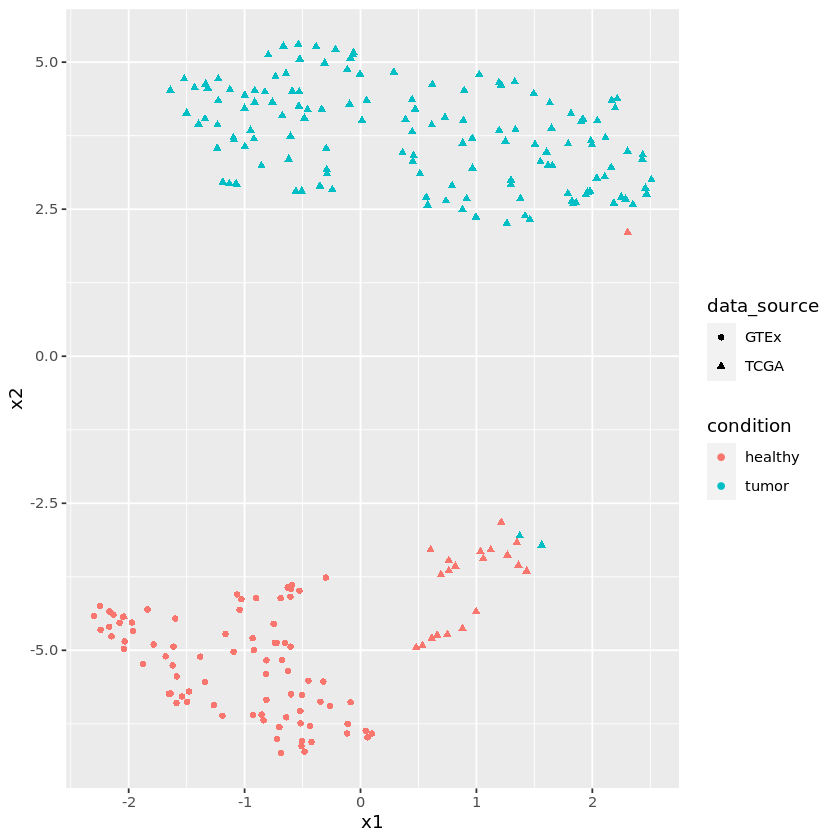

In [93]:
ggplot(data = umap_df) +
    aes(x = x1, y = x2, color = condition, shape = data_source) +
    geom_point()